In [1]:

import sys
import os
import pandas as pd
import matplotlib.pyplot as plt
# Add the scripts directory to the Python path
sys.path.append(os.path.abspath(os.path.join("..", "scripts")))
from plot import (
    plot_histogram, 
    plot_scatter, 
    plot_time_series, 
    plot_boxplot,
    plot_correlation_matrix
)

# Now you can import the functions
from utils import (
    read_csv_file,
    calculate_summary_statistics,
    calculate_correlation_matrix,
    detect_outliers,
    convert_to_datetime,
    calculate_daily_returns,
    calculate_moving_average,
)



# Load the CSV file into a DataFrame
data_info = read_csv_file("Data/yfinance_data/MSFT_historical_data.csv")
df = data_info["data"]
print("Row count: ",data_info["row_count"])

Row count:  9672


Summary Statistics:
                                 Date         Open         High          Low  \
count                           9672  9672.000000  9672.000000  9672.000000   
mean   2005-05-13 08:39:09.379652736    58.402199    59.003071    57.784759   
min              1986-03-13 00:00:00     0.088542     0.092014     0.088542   
25%              1995-10-03 18:00:00     5.695313     5.770508     5.617188   
50%              2005-05-11 12:00:00    27.304999    27.600000    27.085000   
75%              2014-12-17 06:00:00    46.687500    47.099998    46.138672   
max              2024-07-30 00:00:00   467.000000   468.350006   464.459991   
std                              NaN    90.122302    90.958645    89.232546   

             Close    Adj Close        Volume    Dividends  Stock Splits  
count  9672.000000  9672.000000  9.672000e+03  9672.000000   9672.000000  
mean     58.417683    52.719365  5.677678e+07     0.002982      0.001758  
min       0.090278     0.055665  2.304000e

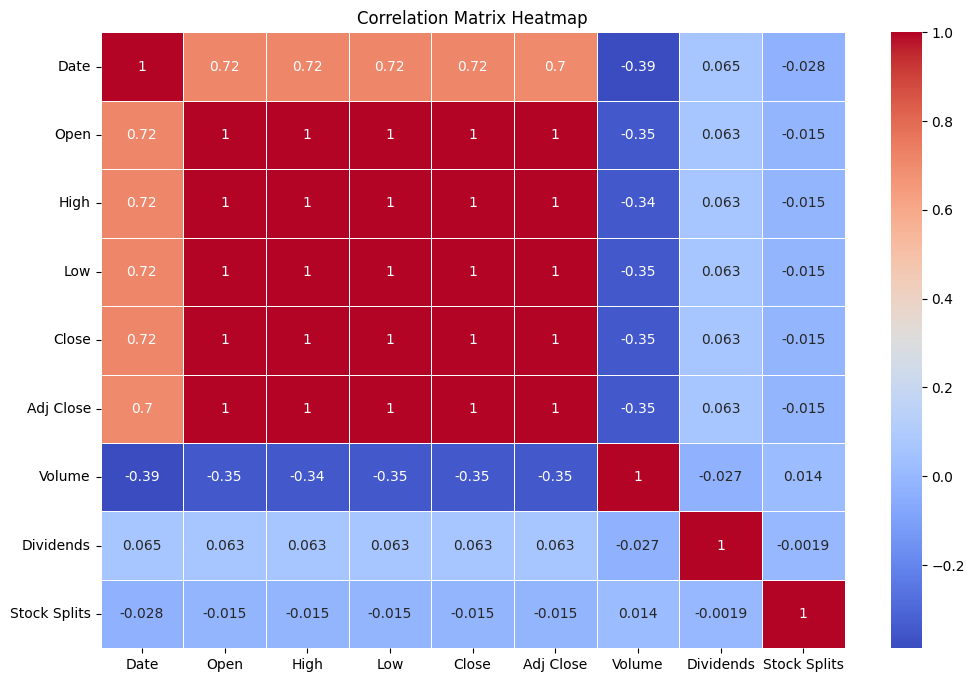

Outliers in 'Close' column:
            Date        Open        High         Low       Close   Adj Close  \
8159 2018-07-25  107.959999  111.150002  107.599998  110.830002  103.822014   
8160 2018-07-26  110.739998  111.000000  109.500000  109.620003  102.688515   
8167 2018-08-06  108.120003  108.419998  107.559998  108.129997  101.292740   
8168 2018-08-07  108.559998  109.099998  108.169998  108.879997  101.995285   
8169 2018-08-08  109.330002  109.750000  108.760002  109.489998  102.566742   
...         ...         ...         ...         ...         ...         ...   
9667 2024-07-24  440.450012  441.480011  427.589996  428.899994  428.128326   
9668 2024-07-25  428.799988  429.799988  417.510010  418.399994  417.647217   
9669 2024-07-26  418.200012  428.920013  417.269989  425.269989  424.504852   
9670 2024-07-29  431.579987  432.149994  424.700012  426.730011  425.962250   
9671 2024-07-30  427.720001  429.049988  417.359985  422.920013  422.159119   

        Volume  Divide

In [2]:
# Convert 'Date' column to datetime
data = convert_to_datetime(df, 'Date')

# Calculate summary statistics
summary_stats = calculate_summary_statistics(data)
print("Summary Statistics:\n", summary_stats)

# Calculate correlation matrix
correlation_matrix = calculate_correlation_matrix(data)
print("Correlation Matrix:\n", correlation_matrix)
plot_correlation_matrix(data)
# Detect outliers in the 'Close' column
outliers = detect_outliers(data, 'Close')
print("Outliers in 'Close' column:\n", outliers)

# Calculate daily returns for the 'Close' column
data = calculate_daily_returns(data, 'Close')
print("Daily Returns:\n", data[['Date', 'Close', 'Daily_Returns']].head())

# Calculate 20-day moving average for the 'Close' column
data = calculate_moving_average(data, 'Close', 20)
print("20-day Moving Average:\n", data[['Date', 'Close', 'MA_20']].head())

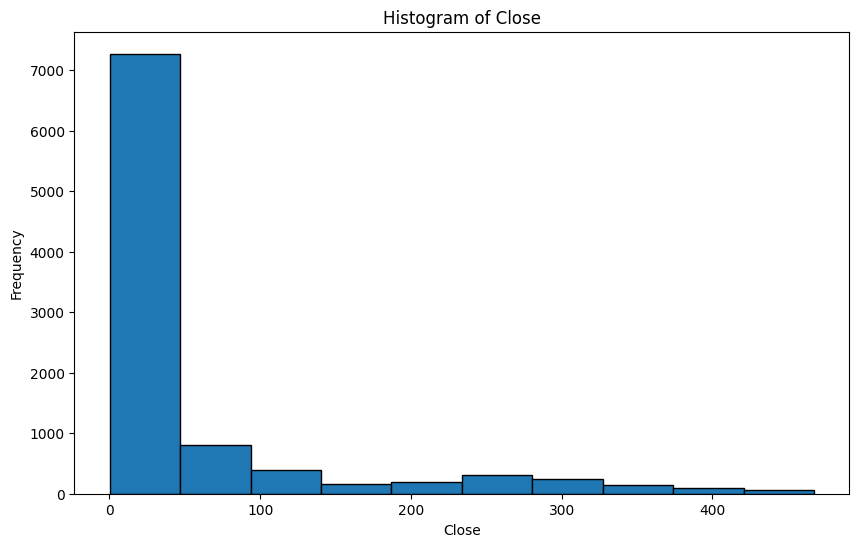

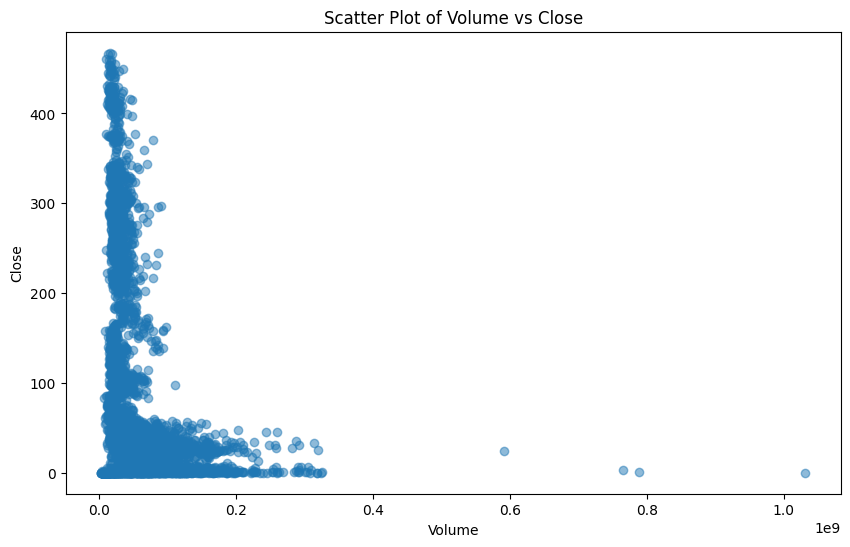

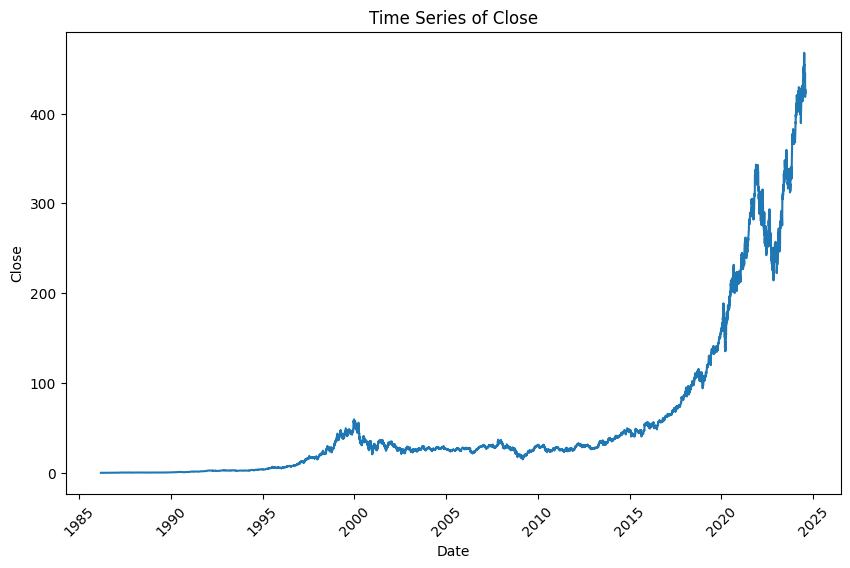

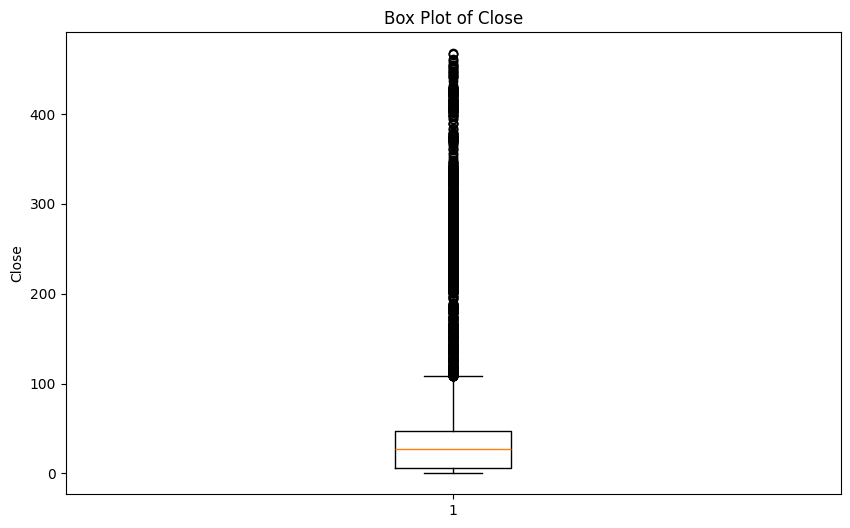

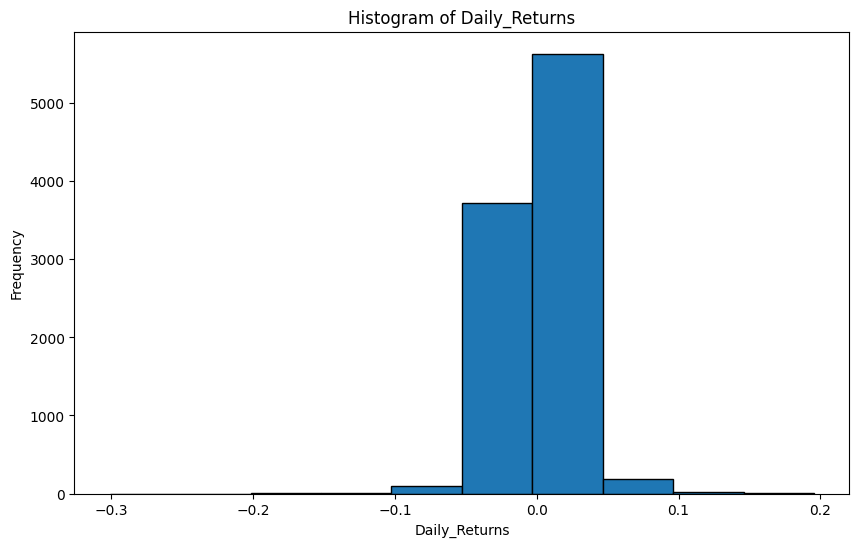

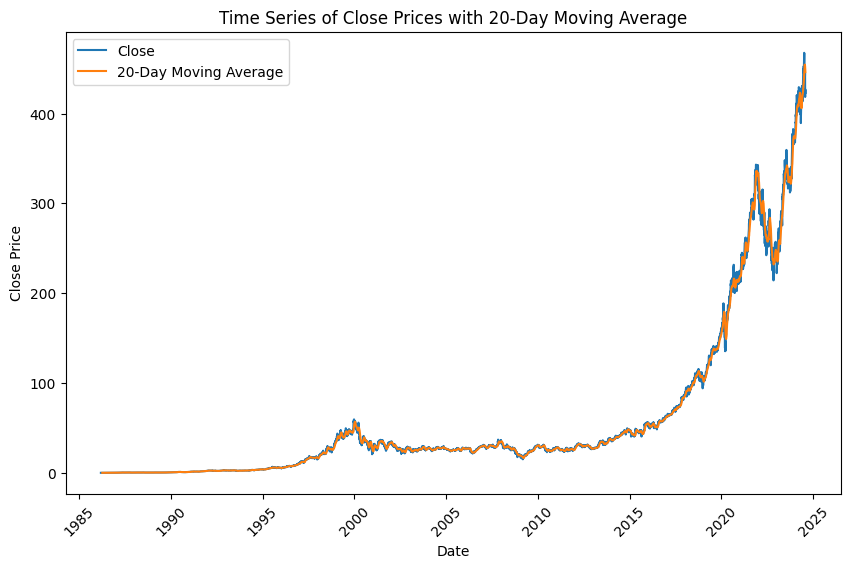

In [3]:

# Convert 'Date' column to datetime
data = convert_to_datetime(data, 'Date')

# Plot histogram of 'Close' prices
plot_histogram(data, 'Close')

# Plot scatter plot of 'Volume' vs 'Close'
plot_scatter(data, 'Volume', 'Close')

# Plot time series of 'Close' prices
plot_time_series(data, 'Date', 'Close')

# Plot box plot of 'Close' prices
plot_boxplot(data, 'Close')

# Calculate daily returns for the 'Close' column
data = calculate_daily_returns(data, 'Close')

# Plot histogram of daily returns
plot_histogram(data, 'Daily_Returns')

# Calculate 20-day moving average for the 'Close' column
data = calculate_moving_average(data, 'Close', 20)

# Plot time series of 'Close' prices with 20-day moving average
plt.figure(figsize=(10, 6))
plt.plot(data['Date'], data['Close'], label='Close')
plt.plot(data['Date'], data['MA_20'], label='20-Day Moving Average')
plt.title('Time Series of Close Prices with 20-Day Moving Average')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.xticks(rotation=45)
plt.show()
